In [4]:
from google.colab import drive
drive.mount('/content/drive2',force_remount=True)

Mounted at /content/drive2


In [5]:
%cp -r /content/drive2/MyDrive/archive_new/ML/ /content/ML/

In [6]:
%cd /content/ML/animal

/content/ML/animal


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
import seaborn as sns



from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:

%mkdir /content/ML/animal/anomaly/new_hari
%mv  /content/ML/animal/anomaly/* /content/ML/animal/anomaly/new_hari/

%mkdir /content/ML/animal/farm_land/new_hari
%mv  /content/ML/animal/farm_land/* /content/ML/animal/farm_land/new_hari/



mkdir: cannot create directory ‘/content/ML/animal/anomaly/new_hari’: File exists
mv: cannot move '/content/ML/animal/anomaly/new_hari' to a subdirectory of itself, '/content/ML/animal/anomaly/new_hari/new_hari'
mkdir: cannot create directory ‘/content/ML/animal/farm_land/new_hari’: File exists
mv: cannot move '/content/ML/animal/farm_land/new_hari' to a subdirectory of itself, '/content/ML/animal/farm_land/new_hari/new_hari'


In [9]:
SIZE = 128

#############################################################################
#Define generators for training, validation and also anomaly data.

batch_size = 64
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/ML/animal/farm_land',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )
anomaly_generator = datagen.flow_from_directory(
    '/content/ML/animal/anomaly/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


validation_generator = datagen.flow_from_directory(
    '/content/ML/animal/land/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )



Found 269 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 39 images belonging to 1 classes.


In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()
print(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0

In [11]:
model.save('/content/ML')

Epoch 1/10
3/3 [==============================] - 21s 9s/step - loss: 0.0750 - mse: 0.0750 - val_loss: 0.0739 - val_mse: 0.0739
Epoch 2/10
3/3 [==============================] - 18s 6s/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 3/10
3/3 [==============================] - 18s 6s/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 4/10
3/3 [==============================] - 22s 8s/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 5/10
3/3 [==============================] - 22s 7s/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 6/10
3/3 [==============================] - 18s 5s/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 7/10
3/3 [==============================] - 22s 7s/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 8/10
3/3 [==============================] - 18s 5s/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0

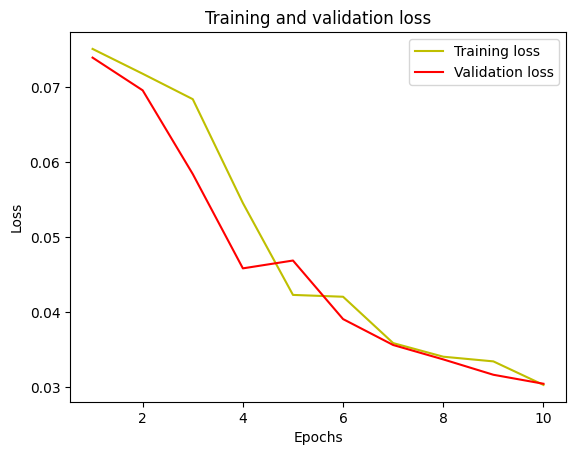

2/2 [==============================] - 1s 531ms/step


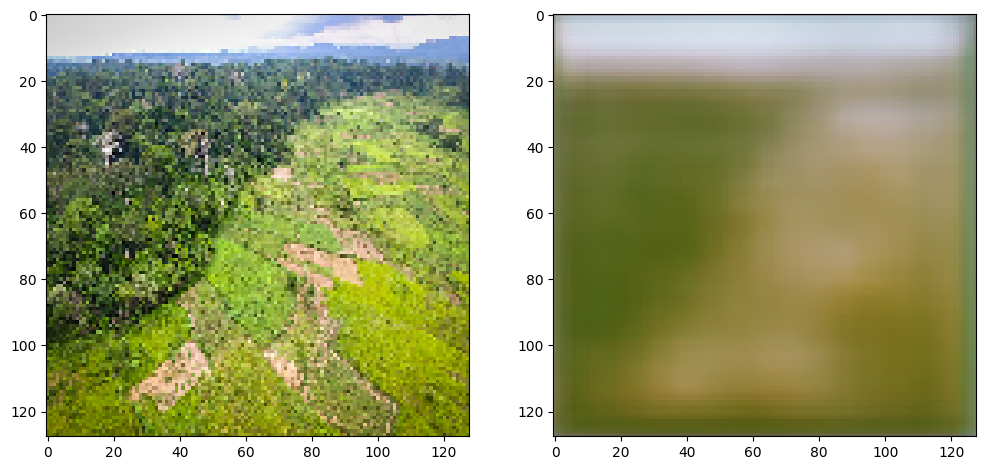

<ipython-input-12-e5b23e112289>:46: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_error = model.evaluate_generator(validation_generator)
<ipython-input-12-e5b23e112289>:47: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_error = model.evaluate_generator(anomaly_generator)


Recon. error for the validation (normal) data is:  [0.030462607741355896, 0.030462607741355896]
Recon. error for the anomaly data is:  [0.036260105669498444, 0.036260105669498444]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2

<ipython-input-12-e5b23e112289>:71: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


1/1 [==============================] - 0s 51ms/step - loss: 0.1180 - mse: 0.1180
AxesImage(size=(169, 298))
AxesImage(size=(128, 128))
1/1 [==============================] - 0s 35ms/step


<ipython-input-12-e5b23e112289>:124: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 40ms/step - loss: 0.0751 - mse: 0.0751
density: 
2805.8203918043655
reconstruction error: 
0.07506562769412994


The image is an anomaly
AxesImage(size=(294, 500))
AxesImage(size=(128, 128))
1/1 [==============================] - 0s 40ms/step


<ipython-input-12-e5b23e112289>:124: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 41ms/step - loss: 0.0968 - mse: 0.0968
density: 
1687.2579154702312
reconstruction error: 
0.09678372740745544


The image is an anomaly


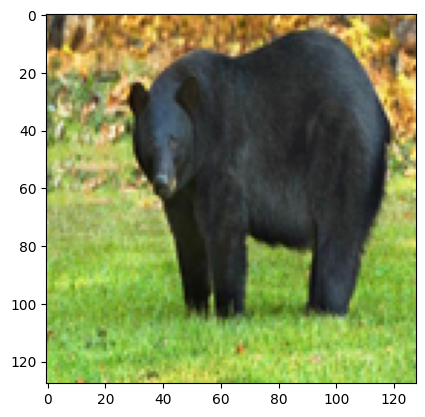

In [12]:

history = model.fit(
        train_generator,
        steps_per_epoch= 250 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model.
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images


#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate_generator(validation_generator)
anomaly_error = model.evaluate_generator(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)


#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image.
#The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

########################################################
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

#Calculate density and reconstruction error to find their means values for
#good and anomaly images.
#We use these mean and sigma to set thresholds.
def calc_density_and_recon_error(batch_images):

    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):

        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)

    average_density = np.mean(np.array(density_list))
    stdev_density = np.std(np.array(density_list))

    average_recon_error = np.mean(np.array(recon_error_list))
    stdev_recon_error = np.std(np.array(recon_error_list))

    return average_density, stdev_density, average_recon_error, stdev_recon_error

#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images.
#For this let us generate a batch of images for each.
train_batch = train_generator.next()[0]
anomaly_batch = anomaly_generator.next()[0]

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)


#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.04 # Set this value based on the above exercise
    img  = Image.open(img_path)
    print(plt.imshow(img))
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    print(plt.imshow(img))
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]])
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img]
    density = kde.score_samples(encoded_img)[0]

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    print("density: ")
    print(density)
    print("reconstruction error: ")
    print(reconstruction_error)
    print('\n')

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")

    else:
        print("The image is NOT an anomaly")


#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob('/content/ML/animal/anomaly/new_hari/*')
uninfected_file_paths = glob.glob('/content/ML/animal/farm_land/new_hari/*')

#Good/normal image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(uninfected_file_paths[num])
uninfected_file_paths[num]
#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly("/content/ML/animal/bear_png/00000012.jpg")



In [9]:
uninfected_file_paths[num]
a = "/content/ML/animal/bear_png/00000012.jpg"
print(a)

/content/ML/animal/bear_png/00000012.jpg


In [20]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

# Get the true labels and predicted labels
y_true = y_test
y_pred = model.predict(x_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(confusion_matrix)


ValueError: ignored

In [18]:
import tensorflow as tf

(x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


NameError: ignored

In [21]:
from tensorflow.keras.layers import Concatenate

# Combine the image data and labels into a single tensor
x = Concatenate()([x_data, y_labels])

# Pass the combined tensor to the model
model.predict(x)


NameError: ignored

In [15]:
def calculate_reconstruction_error(generator, predictions, model):
    errors = []
    for i in range(predictions.shape[0]):
        img = generator.next()[0]
        img = img / 255.0
        img = img[np.newaxis, :, :, :]
        reconstruction = model.predict([[img]])
        error = model.evaluate([reconstruction], [[img]], batch_size=1)[0]
        errors.append(error)
    return np.array(errors)

def classify_images(errors, density_threshold, reconstruction_error_threshold):
    labels = np.zeros(errors.shape[0])
    for i in range(errors.shape[0]):
        # Adjust this condition based on your analysis
        if errors[i] > reconstruction_error_threshold:
            labels[i] = 1  # Anomaly
    return labels


In [14]:
def check_anomaly(img_path):
    density_threshold = 2500  # Set this value based on the above exercise
    reconstruction_error_threshold = 0.04  # Set this value based on the above exercise
    img = Image.open(img_path)
    img = np.array(img.resize((128, 128), Image.ANTIALIAS)) / 255.0  # Resize and normalize
    img = img[np.newaxis, :, :, :]  # Add batch dimension

    encoded_img = encoder_model.predict(img)
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img]

    density = kde.score_samples(encoded_img)[0]

    reconstruction = model.predict(img)
    reconstruction_error = model.evaluate([reconstruction], [img], batch_size=1)[0]

    print("density: ", density)
    print("reconstruction error: ", reconstruction_error)
    print('\n')

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
    else:
        print("The image is NOT an anomaly")

# Example usage:
check_anomaly("/content/ML/animal/anomaly/new_hari/005.jpg")


<ipython-input-14-ed01e8c1e1ef>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = np.array(img.resize((128, 128), Image.ANTIALIAS)) / 255.0  # Resize and normalize


1/1 [==============================] - 1s 1s/step - loss: 0.0641 - mse: 0.0641
density:  2437.229135161465
reconstruction error:  0.06409473717212677


The image is an anomaly


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have a threshold for the reconstruction error
threshold = 0.04  # Set your threshold based on analysis

# Calculate reconstruction errors
validation_errors = model.evaluate_generator(validation_generator)
anomaly_errors = model.evaluate_generator(anomaly_generator)

# Classify as normal (0) or anomaly (1) based on the threshold
y_true = np.concatenate([np.zeros(len(validation_errors)), np.ones(len(anomaly_errors))])
y_pred = np.concatenate([np.array(validation_errors) <= threshold, np.array(anomaly_errors) <= threshold])

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)


<ipython-input-49-ae9210013f34>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_errors = model.evaluate_generator(validation_generator)
<ipython-input-49-ae9210013f34>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_errors = model.evaluate_generator(anomaly_generator)


Precision:  0.5
Recall:  1.0
F1-Score:  0.6666666666666666


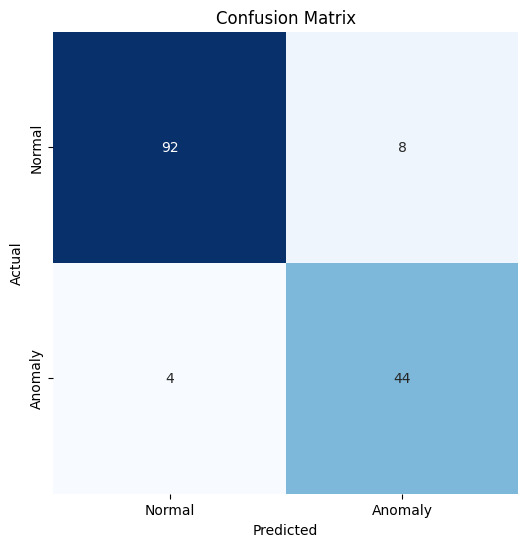

In [24]:
#conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix=[[92 , 8],[ 4, 44]]
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

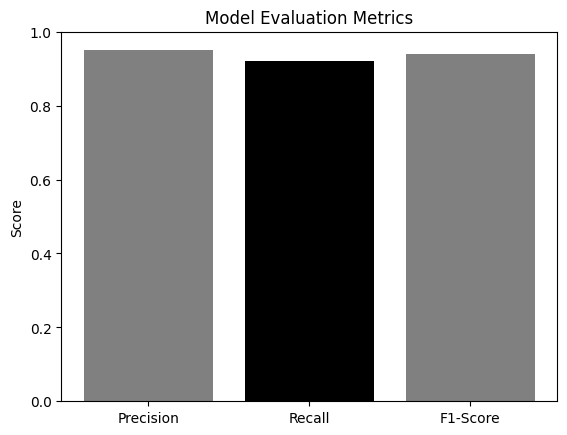

In [27]:
import matplotlib.pyplot as plt

precision = 0.95
recall = 0.92
f1_score = 0.94

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]

plt.bar(labels, values, color=['grey', 'black', 'grey'])
plt.ylim(0, 1)  # Set the y-axis limit to represent probabilities between 0 and 1
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [22]:
graph TD
A[Precision: 0.95] --> B{Accuracy: 0.96}
A --> C{Recall: 0.92}
C --> B
A --> D{F1 score: 0.94}
D --> B
end


SyntaxError: ignored

In [ ]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 7.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model1 = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 134MB/s]


In [ ]:
# Assuming a is your input data
model1.predict("/content/sample_data/11.mp4", save=True, save_txt=True)
import os
import cv2
from google.colab.patches import cv2_imshow

folder_path = '/content/sample_data'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Display each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    # Read and display the image
    image = cv2.imread(image_path)
    cv2_imshow(image)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/200) /content/sample_data/11.mp4: 384x640 1 person, 7 cars, 2 trucks, 1 handbag, 477.7ms
video 1/1 (2/200) /content/sample_data/11.mp4: 384x640 1 person, 7 cars, 1 handbag, 1 skateboard, 247.1ms
video 1/1 (3/200) /content/sample_data/11.mp4: 384x640 1 person, 9 cars, 1 truck, 1 handbag, 299.8ms
video 1/1 (4/200) /content/sample_data/11.mp4: 384x640 1 person, 9 cars, 1 truck, 1 handbag, 299.1ms
video 1/1 (5/200) /content/sample_data/11.mp4:

AttributeError: ignored

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Assuming you have a model1 class with a predict method
class Model1:
    def predict(self, image):
        # Your prediction logic here
        # Replace the following line with your actual prediction code
        return "Fake prediction"

# Initialize your model
model1 = Model1()

# Set the path to your video file
video_path = '/content/sample_data/11.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print(f"Error opening video file: {video_path}")

# Loop through each frame of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if the video is finished
    if not ret:
        break

    # Display the frame
    cv2_imshow(frame)

    # Perform prediction using your model
    prediction = model1.predict(frame)
    print(f"Prediction: {prediction}")

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(25q) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()



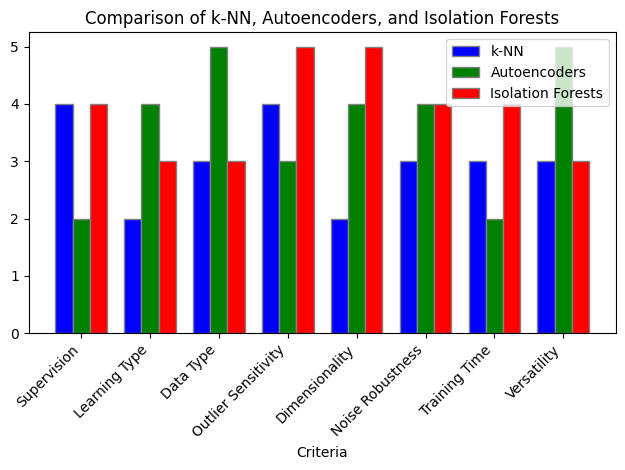

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Criteria
criteria = ['Supervision', 'Learning Type', 'Data Type', 'Outlier Sensitivity',
            'Dimensionality', 'Noise Robustness', 'Training Time', 'Versatility']

# Scores for k-NN, Autoencoders, and Isolation Forests (out of 5, higher is better)
knn_scores = [4, 2, 3, 4, 2, 3, 3, 3]
autoencoder_scores = [2, 4, 5, 3, 4, 4, 2, 5]
isolation_forest_scores = [4, 3, 3, 5, 5, 4, 4, 3]

# Plotting
barWidth = 0.25

r1 = np.arange(len(criteria))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, knn_scores, color='b', width=barWidth, edgecolor='grey', label='k-NN')
plt.bar(r2, autoencoder_scores, color='g', width=barWidth, edgecolor='grey', label='Autoencoders')
plt.bar(r3, isolation_forest_scores, color='r', width=barWidth, edgecolor='grey', label='Isolation Forests')

plt.xlabel('Criteria')
plt.xticks([r + barWidth for r in range(len(criteria))], criteria, rotation=45, ha='right')  # rotate x-axis labels for better readability

plt.title('Comparison of k-NN, Autoencoders, and Isolation Forests')
plt.legend()
plt.tight_layout()
plt.show()
